# Phase 1 project

This note book is designed to analyse data National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters  and identify the lowest-risk aircraft for the company to purchase and operate in the commercial and private aviation sectors, providing actionable insights to guide decision-making for the new aviation division

Specifically, this will cover:

* Using pandas to filter data
* Using pandas to handle missing values
* Using matplotlib to create a graph using data from a dataframe

##  Task: Analyze Airplane Data

### The following questions are to be answered from the analysis of the data:
1. Determine which aircraft are the lowest risk for the company to start this new business endeavor.
2. Identify actionable insights to help the head of the new aviation division decide which aircraft to purchase.

### Data Understanding

In this repository under the file path `AviationData.csv` there is a CSV file containing information about events that occured on various aircrafts

There is also `USState_Codes.csv` which contains short form identifies of various states in the United states




### Requirements

#### 1. Filter Data to Relevant Columns

#### 2. Filter Data to Relevant Rows

#### 3. Drop Rows with Missing Values

#### 4. Identify lowest risk plane

#### 5. Plot charts to support the assement above

### Setup

In the cell below we import the relevant libraries



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Open up the CSV file as a dataframe called `df ` 

In the cell below we open the `AviationData.csv` file as a df and print the first 5 rows to get an overview of the data. The data is encoded in latin and the standard `pd.read_csv('data')`command doesn't work hence the need to add
`encoding=latin-1` arguement and setting `low_memory=False` to stop the printing of warnings

In [2]:
df=pd.read_csv('AviationData.csv',encoding='latin-1',low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Identify information about the data set
In the cells below we identify information about the dataset such number of columns and rows and datatypes represented by each column

In [3]:
#Get datatypes of each column and number of rows and columns
df.shape

(88889, 31)

In [4]:
#Get datatypes of each column and number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Overview analysis of the dataset 
* From the cells above, we can see that the dataset has `88889` rows and `31` columns
* The data has various datatypes
* Some columns seems to have null values

#### In the cell below, we will try and identify the number of null values in the dataset

In [5]:
#Percentage of null values from each column
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

## Analysis of the null values in the dataset
* From the cell above we can see almost all the cells have null values apart from 4 columns are `Event.Id`,`Investigation.Type`,`Accident.Number` and `Event.Date`
* We will drop all columns with null percentage value of over 40 % from the data set.This columns include  `Latitude`,`Longitude`,`Airport.Code`,`Airport.Name`,`Aircraft.Category`,`FAR.Description`,`Schedule`,`Air.carrier`.

We want to drop the above columns because there more or close to more missing data than available data, which makes it difficult to extract meaningful insights. Retaining such columns may introduce bias or inaccuracies in our analysis.

In [6]:
# List of columns to drop
columns_to_drop = [
    'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 
    'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier'
]

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [7]:
#Verifying the result that all columns with null percentage value of over 40% are dropped
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Injury.Severity            1.124999
Aircraft.damage            3.593246
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
Purpose.of.flight          6.965991
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5.053494
Broad.phase.of.flight     30.560587
Report.Status              7.178616
Publication.Date          15.492356
dtype: float64

# Dealing with remaining null values

## Location column

First we will start with columns that have non-numerical data such as `Location` 
We will drop all rows where column location is null. This is because the column `Location`  has a null percentage of  0.058500%. Dropping these rows means we are only losing a small portion of ourdata, which is often acceptable.

In [8]:
# Drop rows where 'Location' is null
df.dropna(subset=['Location'], inplace=True)

In [9]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.253273
Injury.Severity            1.125657
Aircraft.damage            3.587469
Registration.Number        1.457726
Make                       0.070916
Model                      0.103560
Amateur.Built              0.110314
Number.of.Engines          6.815854
Engine.Type                7.959521
Purpose.of.flight          6.958812
Total.Fatal.Injuries      12.817857
Total.Serious.Injuries    14.061709
Total.Minor.Injuries      13.411079
Total.Uninjured            6.642503
Weather.Condition          5.050823
Broad.phase.of.flight     30.535700
Report.Status              7.182818
Publication.Date          15.487916
dtype: float64

## Country column

Next we will move to the `Country` column. 

Similar to the Location column, We will drop all rows where column `country` is null. This is because the column `Location`  has a null percentage of  0.253273%. Dropping these rows means we are only losing a small portion of ourdata, which is often acceptable.

In [10]:
# Drop rows where 'Country' is null
df.dropna(subset=['Country'], inplace=True)

In [11]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            1.128515
Aircraft.damage            3.578522
Registration.Number        1.455785
Make                       0.069968
Model                      0.102695
Amateur.Built              0.110595
Number.of.Engines          6.825261
Engine.Type                7.972961
Purpose.of.flight          6.968582
Total.Fatal.Injuries      12.837990
Total.Serious.Injuries    14.086128
Total.Minor.Injuries      13.433846
Total.Uninjured            6.649212
Weather.Condition          5.058006
Broad.phase.of.flight     30.601950
Report.Status              7.201056
Publication.Date          15.462917
dtype: float64

## Injury.Severity column

Next we will move to the `Injury.Severity` column. 

Let's look at the type of data we are dealing with:

In [12]:
injury_severity_percentage = df['Injury.Severity'].value_counts(normalize=True) * 100
injury_severity_percentage

Non-Fatal     76.696115
Fatal(1)       7.004748
Fatal          6.006027
Fatal(2)       4.210610
Incident       2.496233
                ...    
Fatal(156)     0.001141
Fatal(115)     0.001141
Fatal(60)      0.001141
Fatal(31)      0.001141
Fatal(256)     0.001141
Name: Injury.Severity, Length: 109, dtype: float64

Seems like the data should have two categories which are `fatal` and `non-fatal`. But the way data has been stored the rows categorised as `fatal` have an integer placed in brackets making it seem like there more than two categories yet they referring to the same thing. We will clean up the rows by replacing all rows categorised as `fatal(int)` to `fatal`

In [13]:
# Replace 'Fatal(number)' with 'Fatal'
df['Injury.Severity'] = df['Injury.Severity'].str.replace(r'Fatal\(\d+\)', 'Fatal', regex=True)

# Verify the replacement
df['Injury.Severity'].value_counts(normalize=True) * 100

Non-Fatal      76.696115
Fatal          20.256358
Incident        2.496233
Minor           0.248824
Serious         0.197462
Unavailable     0.105008
Name: Injury.Severity, dtype: float64

### Analysis of `Injury.Severity` column
From the above verification we see that most injuries are Non-fatal then Followed by Fatal and we have unavailable which represents the null values. We will drop all rows that have null values since we are only losing a small portion of ourdata, which is often acceptable.

In [14]:
# Drop rows where 'Injury.Severity' is null
df.dropna(subset=['Injury.Severity'], inplace=True)

In [15]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            3.042962
Registration.Number        1.446149
Make                       0.051363
Model                      0.081039
Amateur.Built              0.111857
Number.of.Engines          6.080217
Engine.Type                7.143999
Purpose.of.flight          5.964936
Total.Fatal.Injuries      12.984523
Total.Serious.Injuries    14.246907
Total.Minor.Injuries      13.587180
Total.Uninjured            6.725106
Weather.Condition          4.074784
Broad.phase.of.flight     29.809843
Report.Status              6.245720
Publication.Date          15.330092
dtype: float64

## Aircraft.damage column

Next we will move to the `Aircraft.damage` column. 

The column has 3% missing value percentage. Let's look at how the data is categorised in this column

In [16]:
aircraft_damage_percentage = df['Aircraft.damage'].value_counts(normalize=True) * 100
aircraft_damage_percentage

Substantial    75.148918
Destroyed      21.726744
Minor           3.016034
Unknown         0.108304
Name: Aircraft.damage, dtype: float64

### Analysis of `Aircraft.damage` column

The data seems to be categorical where we have three categories which are Substantial, Destroyed,Unknown and Minor 


In [17]:
# Drop rows where 'Aircraft.damage' is null
df.dropna(subset=['Aircraft.damage'], inplace=True)

In [18]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        1.299649
Make                       0.042380
Model                      0.072988
Amateur.Built              0.096532
Number.of.Engines          5.323382
Engine.Type                6.407600
Purpose.of.flight          4.823064
Total.Fatal.Injuries      12.826972
Total.Serious.Injuries    14.320863
Total.Minor.Injuries      13.486215
Total.Uninjured            6.826690
Weather.Condition          3.404516
Broad.phase.of.flight     29.305677
Report.Status              5.750712
Publication.Date          15.330916
dtype: float64

## Registration.Number column

Next we will move to the `Registration.Number` column. 

The column has 1.2% missing value percentage. Let's look at how the data is categorised in this column

In [19]:
registration_number_percentage = df['Registration.Number'].value_counts(normalize=True) * 100
registration_number_percentage

NONE      0.404332
UNREG     0.145512
None      0.077527
N20752    0.008349
N8402K    0.007156
            ...   
N106Q     0.001193
N5017X    0.001193
N80510    0.001193
N242AT    0.001193
N90840    0.001193
Name: Registration.Number, Length: 75884, dtype: float64

### Analysis of `Registration.Number` column

The data seems to be unique such that each aircraft had a unique registration number and since almost all the rows had the registration number filled apart from 1.2%, we will drop the null values

In [20]:
# Drop rows where 'Registration.Number' is null
df.dropna(subset=['Registration.Number'], inplace=True)

In [21]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.025047
Model                      0.056058
Amateur.Built              0.033396
Number.of.Engines          4.170941
Engine.Type                5.586699
Purpose.of.flight          4.388016
Total.Fatal.Injuries      12.533098
Total.Serious.Injuries    13.655447
Total.Minor.Injuries      12.733475
Total.Uninjured            6.119844
Weather.Condition          3.105842
Broad.phase.of.flight     28.378378
Report.Status              5.815701
Publication.Date          15.295437
dtype: float64

## Make column

Next we will move to the `Make` column. 

The column has 0.02% missing value percentage. Let's look at how the data is categorised in this column

In [22]:
make_number_percentage = df['Make'].value_counts(normalize=True) * 100
make_number_percentage

Cessna                     25.970819
Piper                      14.094320
CESSNA                      5.663259
Beech                       5.016643
PIPER                       3.303468
                             ...    
Padelt                      0.001193
Ultralight Flight, Inc.     0.001193
Labarge                     0.001193
Popehn Arthur J.            0.001193
ZWICKER MURRAY R            0.001193
Name: Make, Length: 8136, dtype: float64

### Analysis of `Make` column
The data seems to be categorised well with no data not looking ot of place


We will drop all rows where column `make` is null. This is because the column `make`  has a null percentage of  0.02%. Dropping these rows means we are only losing a small portion of ourdata, which is often acceptable. 

In [23]:
# Drop rows where 'Make' is null
df.dropna(subset=['Make'], inplace=True)

In [24]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.047721
Amateur.Built              0.032211
Number.of.Engines          4.162441
Engine.Type                5.576168
Purpose.of.flight          4.384343
Total.Fatal.Injuries      12.533852
Total.Serious.Injuries    13.656482
Total.Minor.Injuries      12.733086
Total.Uninjured            6.118992
Weather.Condition          3.098269
Broad.phase.of.flight     28.373558
Report.Status              5.807614
Publication.Date          15.299269
dtype: float64

## Model column

Next we will move to the `Model` column. 

The column has 0.04% missing value percentage. Let's look at how the data is categorised in this column

In [25]:
model_number_percentage = df['Model'].value_counts(normalize=True) * 100
model_number_percentage

152                  2.796577
172                  2.039842
172N                 1.363078
PA-28-140            1.101682
150                  0.971581
                       ...   
E 33                 0.001194
BABY ACE CM-1        0.001194
Christian Eagle I    0.001194
R-22 MARINER         0.001194
582 FIB              0.001194
Name: Model, Length: 11544, dtype: float64

In [26]:
# Find unique values in the 'Model' column
unique_model = df['Model'].unique()

# Display the unique values
print(unique_model)

['108-3' 'PA24-180' '172M' ... 'ROTORWAY EXEC 162-F' 'KITFOX S5'
 'M-8 EAGLE']


### Analysis of `Model` column
The data seems to be categorised well with no data not looking ot of place


We will drop all rows where column `model` is null. This is because the column `model`  has a null percentage of  0.04%. Dropping these rows means we are only losing a small portion of ourdata, which is often acceptable. 

In [27]:
# Drop rows where 'Make' is null
df.dropna(subset=['Model'], inplace=True)

In [28]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.032227
Number.of.Engines          4.158461
Engine.Type                5.562120
Purpose.of.flight          4.379275
Total.Fatal.Injuries      12.532674
Total.Serious.Injuries    13.654647
Total.Minor.Injuries      12.733197
Total.Uninjured            6.118332
Weather.Condition          3.090199
Broad.phase.of.flight     28.373975
Report.Status              5.799644
Publication.Date          15.304186
dtype: float64

## Amateur.Built column

Next we will move to the `Amateur.Built` column. 

The column has 0.03% missing value percentage. Let's look at how the data is categorised in this column

In [29]:
# Find unique values in the 'Amateur.Built' column
unique_amateur_built = df['Amateur.Built'].unique()

# Display the unique values
print(unique_amateur_built)

['No' 'Yes' nan]


In [30]:
amateur_built_percentage = df['Amateur.Built'].value_counts(normalize=True) * 100
amateur_built_percentage

No     90.006447
Yes     9.993553
Name: Amateur.Built, dtype: float64

### Analysis of `Amateur.Built` column
The data seems to be categorised well with no data not looking ot of place

We will fill the null values with no since it won't skew the data any further

In [31]:
# Fill null values in 'Amateur.Built' column with 'No'
df['Amateur.Built'].fillna('No', inplace=True)

In [32]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          4.158461
Engine.Type                5.562120
Purpose.of.flight          4.379275
Total.Fatal.Injuries      12.532674
Total.Serious.Injuries    13.654647
Total.Minor.Injuries      12.733197
Total.Uninjured            6.118332
Weather.Condition          3.090199
Broad.phase.of.flight     28.373975
Report.Status              5.799644
Publication.Date          15.304186
dtype: float64

## Number.of.Engines column

Next we will move to the `Number.of.Engines` column. 

The column has 4.1% missing value percentage. Let's look at how the data is categorised in this column

In [33]:
# Find unique values in the 'Number.of.Engines' column
unique_number_engines = df['Number.of.Engines'].unique()

# Display the unique values
print(unique_number_engines)

[ 1. nan  2.  0.  4.  3.  8.  6.]


In [34]:
number_engine_percentage = df['Number.of.Engines'].value_counts(normalize=True) * 100
number_engine_percentage

1.0    85.869958
2.0    12.039055
0.0     1.322590
3.0     0.394784
4.0     0.369877
8.0     0.002491
6.0     0.001245
Name: Number.of.Engines, dtype: float64

In [35]:
# Calculate mean and median of 'Number.of.Engines'
mean_engines = df['Number.of.Engines'].mean()
median_engines = df['Number.of.Engines'].median()

# Display the results
print(f"Mean: {mean_engines}")
print(f"Median: {median_engines}")

Mean: 1.1263932650036739
Median: 1.0


### Analysis of `Number.of.Engines` column

The data has 6 categories of engines in which 1-engine aircraft is 85.89% followed by 2-engine aircraft with a percentage of 12%.

The mean of the engine is 1.12 and the median is 1.

From the above we will fill the null values with 1 which will not skew the data in any way since 1 engine aircraft are already majority


In [36]:
# Fill null values in 'Number.of.Engines' column with 1'
df['Number.of.Engines'].fillna(1, inplace=True)

In [37]:
#verification of replacement
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                5.562120
Purpose.of.flight          4.379275
Total.Fatal.Injuries      12.532674
Total.Serious.Injuries    13.654647
Total.Minor.Injuries      12.733197
Total.Uninjured            6.118332
Weather.Condition          3.090199
Broad.phase.of.flight     28.373975
Report.Status              5.799644
Publication.Date          15.304186
dtype: float64

## Engine.Type column

Next we will move to the `Engine.Type` column. 

The column has 5.1% missing value percentage. Let's look at how the data is categorised in this column

In [38]:
# Find unique values in the 'Number.of.Engines' column
unique_engine_type = df['Engine.Type'].unique()

# Display the unique values
print(unique_engine_type)

['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'None' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR'
 'NONE' 'UNK']


In [39]:
#Find value counts in percentage form of each engine type
engine_type_percentage = df['Engine.Type'].value_counts(normalize=True) * 100
engine_type_percentage

Reciprocating      87.204408
Turbo Shaft         4.328813
Turbo Prop          3.944591
Turbo Fan           1.932483
Unknown             1.881928
Turbo Jet           0.669860
None                0.020222
Electric            0.010111
NONE                0.002528
Geared Turbofan     0.001264
LR                  0.001264
Hybrid Rocket       0.001264
UNK                 0.001264
Name: Engine.Type, dtype: float64

### Analysis of `Engine.Type` column

From the analysis the engine type, the engine type with highest percentage is Reciprocating engines at 87% followed by Turbo Shaft, Turbo prop.

From the analysis we seem to be having two categories having `NONE` and `none` engine types. I assumed that the they are referring to the same engine type first thing is will replace all `NONE` with `none`

In [40]:
# Replace 'NONE' with 'none' in the 'Engine.Type' column
df['Engine.Type'] = df['Engine.Type'].replace('NONE', 'none')

# Verify the replacement
print(df['Engine.Type'].value_counts())

Reciprocating      68997
Turbo Shaft         3425
Turbo Prop          3121
Turbo Fan           1529
Unknown             1489
Turbo Jet            530
None                  16
Electric               8
none                   2
Geared Turbofan        1
LR                     1
Hybrid Rocket          1
UNK                    1
Name: Engine.Type, dtype: int64


### Analysis of `Engine.Type` column continued

Since the percentage of null values is 5.5% we will replace the null values with Reciprocating engine type since the data is already skewed towards the engine type

In [41]:
# Fill null values in 'Engine.Type' column with Reciprocating
df['Engine.Type'].fillna('Reciprocating', inplace=True)

In [42]:
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          4.379275
Total.Fatal.Injuries      12.532674
Total.Serious.Injuries    13.654647
Total.Minor.Injuries      12.733197
Total.Uninjured            6.118332
Weather.Condition          3.090199
Broad.phase.of.flight     28.373975
Report.Status              5.799644
Publication.Date          15.304186
dtype: float64

## Purpose.of.flight column

Next we will move to the `Purpose.of.flight` column. 

The column has 4.3% missing value percentage. Let's look at how the data is categorised in this column

In [43]:
# Find unique values in the 'Purpose.of.flight' column
unique_purpose_flight = df['Purpose.of.flight'].unique()

# Display the unique values
print(unique_purpose_flight)

['Personal' nan 'Business' 'Instructional' 'Unknown' 'Ferry'
 'Executive/corporate' 'Aerial Observation' 'Aerial Application'
 'Public Aircraft' 'Skydiving' 'Other Work Use' 'Positioning'
 'Flight Test' 'Air Race/show' 'Air Drop' 'Public Aircraft - Federal'
 'Glider Tow' 'Public Aircraft - Local' 'External Load'
 'Public Aircraft - State' 'Banner Tow' 'Firefighting' 'Air Race show'
 'PUBS' 'ASHO' 'PUBL']


In [44]:
#Find value counts of each unique purpose
purpose_flight_percentage = df['Purpose.of.flight'].value_counts(normalize=True) * 100
purpose_flight_percentage

Personal                     60.930947
Instructional                13.055472
Unknown                       6.942780
Aerial Application            5.833084
Business                      4.815758
Positioning                   1.956012
Other Work Use                1.477931
Ferry                         0.987368
Aerial Observation            0.927452
Public Aircraft               0.866287
Executive/corporate           0.629119
Flight Test                   0.484322
Skydiving                     0.219692
External Load                 0.141053
Banner Tow                    0.126073
Public Aircraft - Federal     0.124825
Air Race show                 0.112343
Public Aircraft - Local       0.087378
Public Aircraft - State       0.074895
Air Race/show                 0.069902
Glider Tow                    0.066157
Firefighting                  0.044937
Air Drop                      0.012483
ASHO                          0.007490
PUBS                          0.004993
PUBL                     

### Analysis of `Purpose.of.flight` column 

The data in this column seems to be skeweed towards Personal as the purpose of the flight and the null values percentage is 4.3%. I have decided to replace null data values with the value `Personal` since it won't have an effect on general skeweness of data

In [45]:
# Fill null values in 'Purpose.of.flight' column with Reciprocating
df['Purpose.of.flight'].fillna('Personal', inplace=True)
# Verify the replacement
df['Purpose.of.flight'].value_counts(normalize=True) * 100

Personal                     62.641888
Instructional                12.483737
Unknown                       6.638737
Aerial Application            5.577637
Business                      4.604863
Positioning                   1.870352
Other Work Use                1.413208
Ferry                         0.944128
Aerial Observation            0.886836
Public Aircraft               0.828350
Executive/corporate           0.601568
Flight Test                   0.463112
Skydiving                     0.210071
External Load                 0.134875
Banner Tow                    0.120552
Public Aircraft - Federal     0.119359
Air Race show                 0.107423
Public Aircraft - Local       0.083551
Public Aircraft - State       0.071615
Air Race/show                 0.066841
Glider Tow                    0.063260
Firefighting                  0.042969
Air Drop                      0.011936
ASHO                          0.007162
PUBS                          0.004774
PUBL                     

In [46]:
#Verify whether the percentage of null values is now zero
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries      12.532674
Total.Serious.Injuries    13.654647
Total.Minor.Injuries      12.733197
Total.Uninjured            6.118332
Weather.Condition          3.090199
Broad.phase.of.flight     28.373975
Report.Status              5.799644
Publication.Date          15.304186
dtype: float64

## Injuries column

We will move to the next four columns which deal with injuries. The columns are `Total.Fatal.Injuries`, `Total.Serious.Injuries`,`Total.Minor.Injuries`and `Total.Uninjured` 

The Distribution of null values for each of the above columns is listed below:

* Total.Fatal.Injuries - 12.532674%
* Total.Serious.Injuries - 13.654647%
* Total.Minor.Injuries - 12.733197%
* Total.Uninjured - 6.118332%

We will first get identify the datatypes stored on each of the above 4 listed columns in order to proceed with our analysis. I will create function to handle the above in order to prevent code repetition

In [47]:
#Function to identify data types 

def print_column_dtype(df, column_name):
    """
    Prints the name of the column and its data type.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the column.
        column_name (str): The name of the column.
    """
    if column_name in df.columns:
        dtype = df[column_name].dtype
        print(f"The column '{column_name}' has data type: {dtype}")
    else:
        print(f"Column '{column_name}' does not exist in the DataFrame.")


In [48]:
#Identiying data types in each of the four Injury columns
print_column_dtype(df, 'Total.Fatal.Injuries')
print_column_dtype(df, 'Total.Serious.Injuries')
print_column_dtype(df, 'Total.Minor.Injuries')
print_column_dtype(df, 'Total.Uninjured')

The column 'Total.Fatal.Injuries' has data type: float64
The column 'Total.Serious.Injuries' has data type: float64
The column 'Total.Minor.Injuries' has data type: float64
The column 'Total.Uninjured' has data type: float64


### Analysis of Injuries columns
First we can see that data type of all listed columns above is float. This means that we are dealing with numerical data. We can therefore calculate measures of central tendency.

We will then do the mean and median of all the four columns together to avoid repeating the same code

In [49]:
#Function to get the mean and median based on column passed
def print_column_stats(df, column_name):
    """
    Prints the mean and median of a specified column in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the column.
        column_name (str): The name of the column.
    """
    if column_name in df.columns:
        mean_value = df[column_name].mean()
        median_value = df[column_name].median()
        print(f"The column '{column_name}' has:")
        print(f"Mean: {mean_value}")
        print(f"Median: {median_value}")
    else:
        print(f"Column '{column_name}' does not exist in the DataFrame.")

In [50]:
#Identiying mean and median in each of the four Injury columns

print_column_stats(df, 'Total.Fatal.Injuries')
print_column_stats(df, 'Total.Serious.Injuries')
print_column_stats(df, 'Total.Minor.Injuries')
print_column_stats(df, 'Total.Uninjured')

The column 'Total.Fatal.Injuries' has:
Mean: 0.558494016184277
Median: 0.0
The column 'Total.Serious.Injuries' has:
Mean: 0.25812471489197
Median: 0.0
The column 'Total.Minor.Injuries' has:
Mean: 0.33096713306799064
Median: 0.0
The column 'Total.Uninjured' has:
Mean: 3.309554383065285
Median: 1.0


### Analysis of Injuries columns continued

#### `Total.Fatal.Injuries`
From the above function we can see that the mean and median of the Fatal Injuries is 0.5584 and 0 respectively.

#### `Total.Serious.Injuries`
The mean and median of the Serious Injuries is 0.2581 and 0 respectively.

#### `Total.Minor.Injuries`
The mean and median of the Minor Injuries is 0.3309 and 0 respectively.

#### `Total.Uninjured`
The mean and median of the Uninjured is 3.3095 and 0 respectively.

This does not guide us on how to deal with the null values.We will plot Histogram to view how the data is skewed for each of the four columns

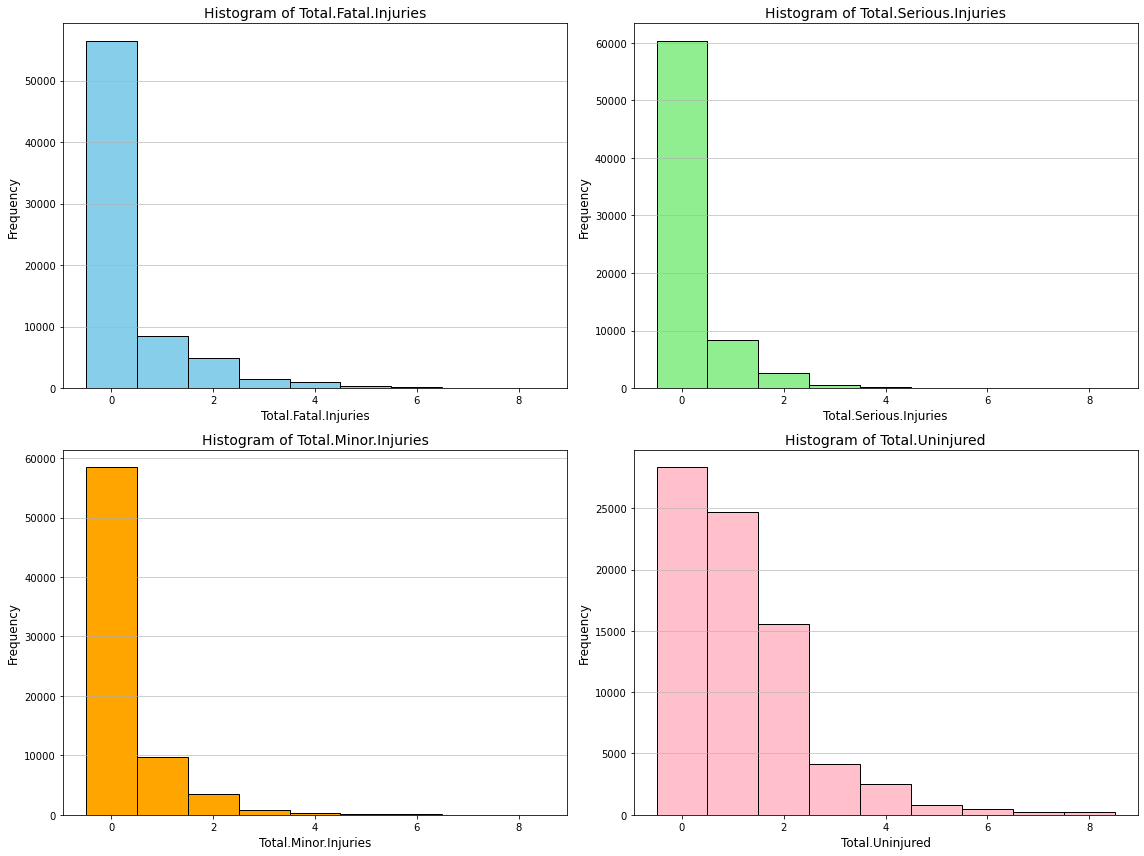

In [51]:
# Define the columns and corresponding colors
columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
colors = ['skyblue', 'lightgreen', 'orange', 'pink']

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Create a 2x2 grid
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plot each column
for i, col in enumerate(columns):
    axes[i].hist(df[col].dropna(), bins=range(0, 10), 
                 color=colors[i], edgecolor='black', align='left')
    axes[i].set_title(f'Histogram of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(axis='y', alpha=0.75)

# Adjust layout
plt.tight_layout()
plt.show()

### Analysis of Injuries column continued

From the histogram above, looking at the `Total Fatal Injuries`, `Total Serious Injuries` and `Total Minor Injuries`. The data seems to skewed towards 0 which is all the above three columns have a median of zero. Therefore we will fill all null values with 0 since the data is already and it won't have an effect on the data

For the last remaining column, `Total Uninjured`, the mean is 3.3 but looking at the data, is skewed towards 0 and since our median is 1, we will fill all null values with 1

Below I will fill fill all the columns above with respective median value as discussed above


In [52]:
# Fill null values in 'Total.Fatal.Injuries' column with 0
df['Total.Fatal.Injuries'].fillna(0, inplace=True)

# Fill null values in 'Total Serious Injuries' column with 0
df['Total.Serious.Injuries'].fillna(0, inplace=True)

# Fill null values in 'Total.Fatal.Injuries' column with 0
df['Total.Minor.Injuries'].fillna(0, inplace=True)

# Fill null values in 'Total.Fatal.Injuries' column with 0
df['Total.Uninjured'].fillna(1, inplace=True)

In [53]:
#Verifying null values have been replaced
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          3.090199
Broad.phase.of.flight     28.373975
Report.Status              5.799644
Publication.Date          15.304186
dtype: float64

##  Weather condition column
Next we will move to the `Weather.Condition` column. 

The column has 3.09% missing value percentage. Let's look at how the data is categorized in the column

In [54]:
#Get ditribution of data in the column
weather_condition_percentage = df['Weather.Condition'].value_counts(normalize=True) * 100
weather_condition_percentage

VMC    92.085427
IMC     6.884915
UNK     0.790718
Unk     0.238940
Name: Weather.Condition, dtype: float64

### Analysis of Weather condition column

From the above distribution we can see there four categorizations of the weather conditions, VMC,IMC,UNK and Unk.But seems like the last two categories might be reffering to the same weather condition

We will replace all values containing 'Unk' to 'UNK'.

In [55]:
# Replace unk with UNK
df['Weather.Condition'] = df['Weather.Condition'].replace('Unk', 'UNK')

#verifying the replacement
df['Weather.Condition'].value_counts(normalize=True) * 100

VMC    92.085427
IMC     6.884915
UNK     1.029658
Name: Weather.Condition, dtype: float64

### Analysis of Weather condition column continued

From the value counts function above, VMC weather condition seems to be taking the highest percentage of about 92%. This means that the data is skewed towards VMC, hence therefore we will fill the null values with VMC


In [56]:
# Fill null values in 'Total.Fatal.Injuries' column with 0
df['Weather.Condition'].fillna('VMC', inplace=True)

In [57]:
#Verifying null values have been replaced
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          0.000000
Broad.phase.of.flight     28.373975
Report.Status              5.799644
Publication.Date          15.304186
dtype: float64

##  Broad.phase.of.flight column

Next we will move to the `Broad.phase.of.flight` column. 

The column has 28.4% missing value percentage. Let's look at how the data is categorized in the column


In [58]:
#Get distribution of data in the column
phase_flight_percentage = df['Broad.phase.of.flight'].value_counts(normalize=True) * 100
phase_flight_percentage

Landing        25.244547
Takeoff        20.480261
Cruise         16.480861
Maneuvering    13.451316
Approach       10.675065
Climb           3.169525
Taxi            3.087870
Descent         2.852905
Go-around       2.239664
Standing        1.241480
Unknown         0.888200
Other           0.188305
Name: Broad.phase.of.flight, dtype: float64

### Analysis of Broad.phase.of.flight column
The data contained in this column does not help in objectively answering the question at hand therefore I have decided to drop the column altogether


In [59]:
#Dropping Broad.phase.of.flight 
df.drop(columns=['Broad.phase.of.flight'], inplace=True)

#Verifying the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          0.000000
Report.Status              5.799644
Publication.Date          15.304186
dtype: float64

##  Report.Status column

Next we will move to the `Report.Status` column. 

The column has 5.7% missing value percentage. Let's look at how the data is categorized in the column

In [60]:
#Get distribution of data in the column
report_status_percentage = df['Report.Status'].value_counts(normalize=True) * 100
report_status_percentage

Probable Cause                                                                                                                                                                                                                                         76.072578
Foreign                                                                                                                                                                                                                                                 0.867946
Factual                                                                                                                                                                                                                                                 0.178657
<br /><br />                                                                                                                                                                                                                         

### Analysis of Report.Status column

From the above distribution we can see there are about 16603 unique categorizations of the report status but the most common data recorded was `Probable Cause` occupying a percentage of about 76.0%. Since the data is already skewed towards this value, I will replace the null values with the value `Probable Cause`


In [62]:
# Fill null values in 'Report.Status' column with Probable Cause
df['Report.Status'].fillna('Probable Cause', inplace=True)

#Verifying the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          0.000000
Report.Status              0.000000
Publication.Date          15.304186
dtype: float64